# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = r"C:\Users\mengc\Desktop\06-Python-APIs\Homework\Instructions\output_data\cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

cityData = []

recordCounter = 1

for city in cities :

    cityLink = url + "&q=" + city

    print("City " + str(recordCounter) + ": " + city)

    recordCounter += 1
    
    try :

        city_weather = requests.get(cityLink).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        cityData.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except :
        print("-------------------------------------------------------")
        print("No city found!")
        pass
    
print("Data done")

City 1: vaini
City 2: kruisfontein
City 3: guerrero negro
City 4: bom jesus
City 5: ponta do sol
City 6: kodiak
City 7: kapaa
City 8: butaritari
City 9: jamestown
City 10: kerman
City 11: nikolskoye
City 12: saint george
City 13: rikitea
City 14: chokurdakh
City 15: tiksi
City 16: mataura
City 17: compiegne
City 18: grindavik
City 19: rincon
City 20: kieta
City 21: hambantota
City 22: chara
City 23: aasiaat
City 24: college
City 25: beringovskiy
City 26: sangod
City 27: klaksvik
City 28: gat
City 29: thompson
City 30: imeni poliny osipenko
City 31: garowe
City 32: boa vista
City 33: sinnamary
City 34: katangli
City 35: qaanaaq
City 36: hilo
City 37: bambous virieux
City 38: severo-kurilsk
City 39: mingshui
City 40: sioux lookout
City 41: yellowknife
City 42: hithadhoo
City 43: vardo
City 44: kurchatov
City 45: hermanus
City 46: atuona
City 47: ushuaia
City 48: inhambane
City 49: stornoway
City 50: barawe
-------------------------------------------------------
No city found!
City 51: co

City 336: lampang
City 337: torquay
City 338: samusu
-------------------------------------------------------
No city found!
City 339: flin flon
City 340: aklavik
City 341: machachi
City 342: waipawa
City 343: lodeynoye pole
City 344: bilibino
City 345: teneguiban
-------------------------------------------------------
No city found!
City 346: fortuna
City 347: zhezkazgan
City 348: angoche
City 349: richards bay
City 350: taltal
City 351: ilulissat
City 352: grand river south east
-------------------------------------------------------
No city found!
City 353: iqaluit
City 354: nokaneng
City 355: walvis bay
City 356: bur gabo
-------------------------------------------------------
No city found!
City 357: hualmay
City 358: galeana
City 359: clyde river
City 360: pochutla
City 361: luau
City 362: santiago del estero
City 363: grahamstown
City 364: zhaodong
City 365: takoradi
City 366: rusape
City 367: kokoda
City 368: kilindoni
City 369: nandikotkur
City 370: huarmey
City 371: madimba
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
cityDataPd = pd.DataFrame(city_data)
cityDataPd.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [45]:
cityDataPd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,75.20,94,75,5.82,TO,1594109659
1,kruisfontein,-34.00,24.73,57.69,61,99,25.61,ZA,1594109729
2,guerrero negro,27.98,-114.06,67.91,79,0,6.29,MX,1594109786
3,bom jesus,-9.07,-44.36,64.17,67,0,1.07,BR,1594110108
4,ponta do sol,32.67,-17.10,70.00,77,20,2.24,PT,1594109738


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
cityDataPd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.184560,14.684632,68.867020,68.958707,53.556553,7.875494,1.594110e+09
std,33.420607,90.210773,15.263895,22.684577,39.607459,5.361036,2.323513e+02
min,-54.800000,-179.170000,23.000000,3.000000,0.000000,0.360000,1.594109e+09
25%,-8.840000,-66.870000,58.350000,55.000000,9.000000,3.850000,1.594110e+09
50%,25.020000,20.580000,69.800000,76.000000,69.000000,6.710000,1.594110e+09
75%,48.680000,92.800000,80.600000,86.000000,92.000000,11.010000,1.594110e+09
max,78.220000,179.320000,111.200000,100.000000,100.000000,30.490000,1.594110e+09


In [47]:
humidityIndex = cityDataPd[(cityDataPd["Humidity"] > 100)].index

humidityIndex

Int64Index([], dtype='int64')

In [49]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityDataPd.drop(humidityIndex, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,75.20,94,75,5.82,TO,1594109659
1,kruisfontein,-34.00,24.73,57.69,61,99,25.61,ZA,1594109729
2,guerrero negro,27.98,-114.06,67.91,79,0,6.29,MX,1594109786
3,bom jesus,-9.07,-44.36,64.17,67,0,1.07,BR,1594110108
4,ponta do sol,32.67,-17.10,70.00,77,20,2.24,PT,1594109738


In [61]:
# Extract relevant fields from the data frame
lat = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

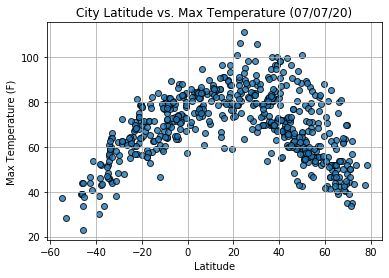

In [64]:
plt.scatter(lat, 
            max_temp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Formating from solutions
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"C:\Users\mengc\Desktop\06-Python-APIs\Homework\Instructions\output_data\Fig1.png")

plt.show()

## Latitude vs. Humidity Plot

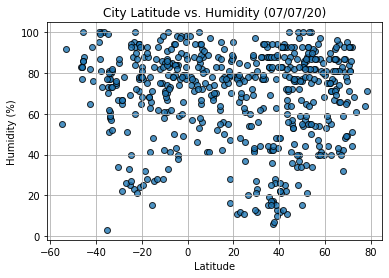

In [65]:
#Formating from Solutions
plt.scatter(lat, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"C:\Users\mengc\Desktop\06-Python-APIs\Homework\Instructions\output_data\Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

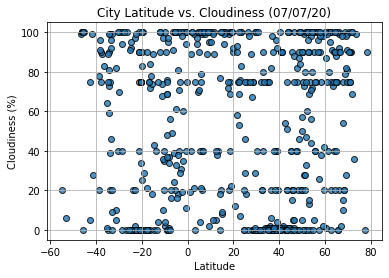

In [67]:
#Formating from Solutions
plt.scatter(lat, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"C:\Users\mengc\Desktop\06-Python-APIs\Homework\Instructions\output_data\Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

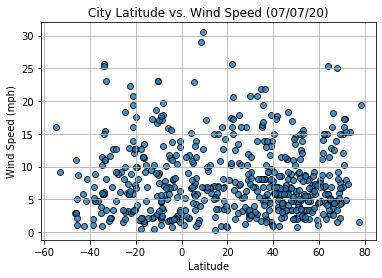

In [69]:
# Formating from solutions

plt.scatter(lat, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"C:\Users\mengc\Desktop\06-Python-APIs\Homework\Instructions\output_data\Fig4.png")

plt.show()

## Linear Regression

In [77]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLinRegress(xVal, yVal, title):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xVal, yVal)
    regress_values = xVal * slope + intercept
    line_eq = "y = " + str(slope) + "x + " + str(slope)

    # Plot
    plt.scatter(xVal, yVal)
    plt.plot(xVal, regress_values, "r-")
    plt.annotate(line_eq, (0, 30), fontsize=12, color="green")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [73]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = cityDataPd.loc[(cityDataPd["Lat"] >= 0)]
southern_hemi_df = cityDataPd.loc[(cityDataPd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3961596602339001


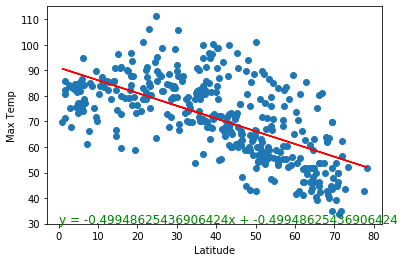

In [79]:
xNorthVal = northern_hemi_df["Lat"]
yNorthVal = northern_hemi_df["Max Temp"]
plotLinRegress(xNorthVal, yNorthVal, 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6192230950070895


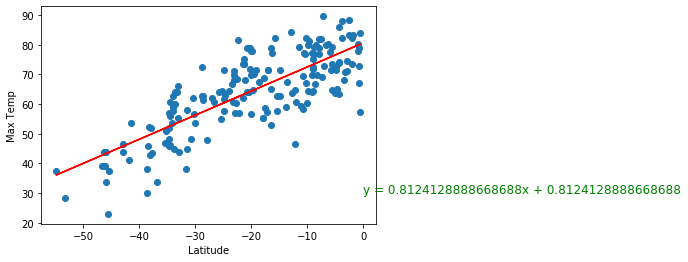

In [81]:
xSouthVal = southern_hemi_df["Lat"]
ySouthVal = southern_hemi_df["Max Temp"]
plotLinRegress(xSouthVal, ySouthVal, 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001016177586923984


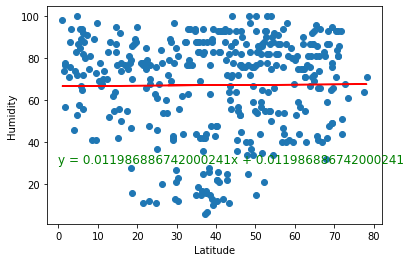

In [87]:
xNorthVal = northern_hemi_df["Lat"]
yNorthVal = northern_hemi_df["Humidity"]
plotLinRegress(xNorthVal, yNorthVal, 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00025801141577911735


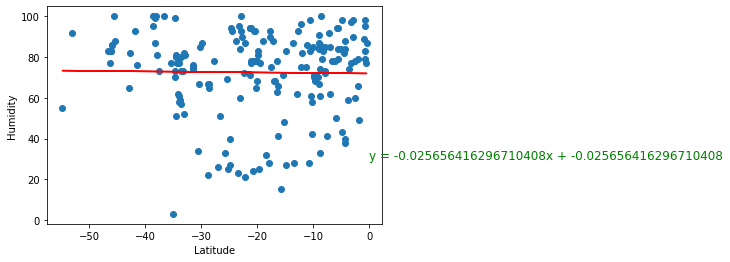

In [86]:
xSouthVal = southern_hemi_df["Lat"]
ySouthVal = southern_hemi_df["Humidity"]
plotLinRegress(xSouthVal, ySouthVal, 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00022136196707070037


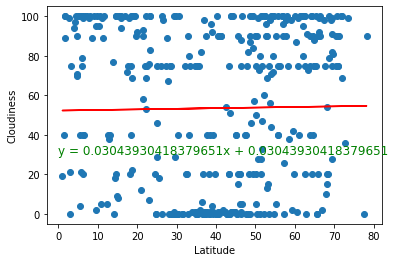

In [82]:
xNorthVal = northern_hemi_df["Lat"]
yNorthVal = northern_hemi_df["Cloudiness"]
plotLinRegress(xNorthVal, yNorthVal, "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004547508740340837


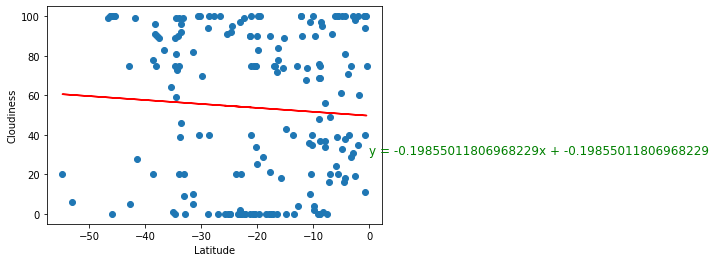

In [83]:
xSouthVal = southern_hemi_df["Lat"]
ySouthVal = southern_hemi_df["Cloudiness"]
plotLinRegress(xSouthVal, ySouthVal, 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0008274162079976536


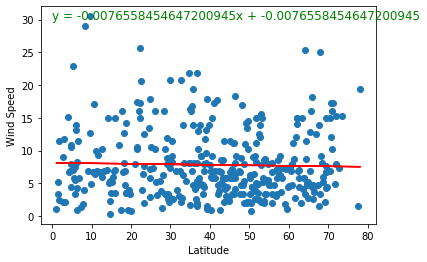

In [88]:
xNorthVal = northern_hemi_df["Lat"]
yNorthVal = northern_hemi_df["Wind Speed"]
plotLinRegress(xNorthVal, yNorthVal, 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0008514687570498639


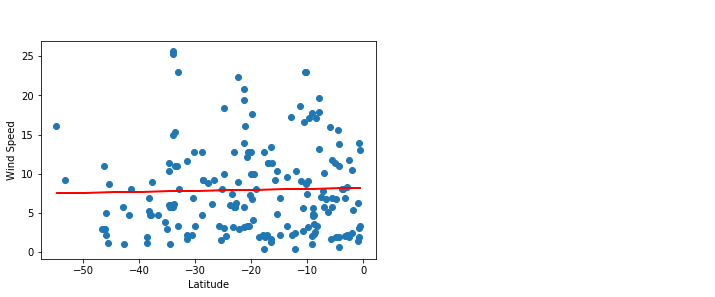

In [89]:
xSouthVal = southern_hemi_df["Lat"]
ySouthVal = southern_hemi_df["Wind Speed"]
plotLinRegress(xSouthVal, ySouthVal, 'Wind Speed')